In [1]:
%load_ext autoreload
%autoreload 2

%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import os
from scrinet.workflow.pipe_utils import load_model
from scrinet.sample import sample_helpers
from scrinet.analysis import timeseries_batch as ts

import matplotlib.pyplot as plt
import numpy as np
import lal

import tensorflow as tf
import tensorflow_probability as tfp

tfb = tfp.bijectors
tfd = tfp.distributions

<IPython.core.display.Javascript object>

In [4]:
def setup_surrogate(user="rg"):
    if user == "sk":
        #         rootdir = "/Users/spx8sk/work/data/scrinet/3D_NP"
        rootdir = "/Users/spx8sk/work/data/scrinet/ann-sur-final-model"
    elif user == "rg":
        rootdir = "/Users/Rhys/Documents/PhD/PE/NN_for_PE/ann-sur-final-model"

    amp_basis = os.path.join(rootdir, "amp_eim_basis.npy")
    amp_model_dir = os.path.join(rootdir, "results_4_320_relu_Adam")

    phase_basis = os.path.join(rootdir, "phase_eim_basis.npy")
    phase_model_dir = os.path.join(rootdir, "results_4_320_softplus_Adamax")

    amp_model, amp_basis = load_model(
        basis_file=amp_basis,
        nn_weights_file=os.path.join(amp_model_dir, "model.h5"),
        X_scalers_file=os.path.join(amp_model_dir, "X_scalers.npy"),
        Y_scalers_file="",
    )

    phase_model, phase_basis = load_model(
        basis_file=phase_basis,
        nn_weights_file=os.path.join(phase_model_dir, "model.h5"),
        X_scalers_file=os.path.join(phase_model_dir, "X_scalers.npy"),
        Y_scalers_file=os.path.join(phase_model_dir, "y_scalers.npy"),
    )

    amp_basis = tf.convert_to_tensor(amp_basis, dtype=tf.float32)
    phase_basis = tf.convert_to_tensor(phase_basis, dtype=tf.float32)

    return amp_model, amp_basis, phase_model, phase_basis

<IPython.core.display.Javascript object>

In [5]:
amp_model, amp_basis, phase_model, phase_basis = setup_surrogate(user="rg")

<IPython.core.display.Javascript object>

## The test below showed the desired behaviour, the function once compiled is faster even where the values it's evaluated on changes

In [6]:
# # @tf.function(experimental_compile=True)
# def random_tf_func(x):
#     return tf.math.exp(-(x ** 2))

<IPython.core.display.Javascript object>

In [7]:
# %%time
# a = tf.cast(tf.range(10 ** 6), tf.float64)
# b = random_tf_func(a)

<IPython.core.display.Javascript object>

In [8]:
# a = tf.cast(tf.range(10 ** 6), tf.float64)

<IPython.core.display.Javascript object>

In [9]:
# %%time
# for num in tf.linspace(0, 10, 10 ** 3):
#     b = random_tf_func(num * a)

<IPython.core.display.Javascript object>

In [10]:
# @tf.function(experimental_compile=True)
# def xla_random_tf_func(x):
#     return tf.math.exp(-(x ** 2))

<IPython.core.display.Javascript object>

In [11]:
# %%timeit
# # with xla compile
# a = tf.cast(tf.range(10 ** 6), tf.float32)
# b = xla_random_tf_func(a)

<IPython.core.display.Javascript object>

In [ ]:
# a = tf.cast(tf.range(10 ** 6), tf.float64)

In [ ]:
# %%time
# #with xla compile
# for num in tf.linspace(0, 10, 10 ** 3):
#     b = xla_random_tf_func(num * a)

## Let's compare to the GW example

In [ ]:
# from scrinet.sample.sample_helpers import amp_predict_hack
# 

In [ ]:
# x = tf.constant([[4, 0, 0], [6, 0, 0], [6, 1, 1], [4, 0, 0]], dtype=tf.float32)

In [ ]:
# %%time
# a =amp_predict_hack(amp_model, x)

In [ ]:
# xla_amp_predict_hack = tf.function(amp_predict_hack, experimental_compile=True)

In [ ]:
# %%time
# a =xla_amp_predict_hack(amp_model, x)

In [ ]:
# %%time
# a =xla_amp_predict_hack(amp_model, x*2)

In [ ]:
# %%time
# for q in np.linspace(1, 8, 101):
#     x = tf.constant([[q, 0, 0], [q, 0, 0], [q, 1, 1]], dtype=tf.float32)
#     amp_predict_hack(amp_model, x)

In [ ]:
# %%time
# for q in np.linspace(1, 8, 101):
#     x = tf.constant([[q, 0, 0], [q, 0, 0], [q, 1, 1]], dtype=tf.float32)
#     xla_amp_predict_hack = tf.function(amp_predict_hack, experimental_compile=True)
#     xla_amp_predict_hack(amp_model, x)

In [ ]:
# xla_amp_predict_hack = tf.function(amp_predict_hack, experimental_compile=True)

In [ ]:
# b = xla_amp_predict_hack(amp_model, x)

In [ ]:
# %%time
# for q in np.linspace(1.1, 8.1, 101):
#     x = tf.constant([[q, 0, 0], [q, 0, 0], [q, 1, 1]], dtype=tf.float32)
#     xla_amp_predict_hack(amp_model, x)

### This seems fine, it looks like it is only compiling once let's try phase

In [ ]:
# from scrinet.sample.sample_helpers import phase_predict_hack


In [ ]:
# %%time
# a = phase_predict_hack(phase_model, x)

In [ ]:
# xla_phase_predict_hack = tf.function(phase_predict_hack, experimental_compile=True)

In [ ]:
# %%time
# b =xla_phase_predict_hack(phase_model, x)

In [ ]:
# %%time
# b =xla_phase_predict_hack(phase_model, x*2)

In [ ]:
# %%time
# for q in np.linspace(1, 8, 101):
#     x = tf.constant([[q, 0, 0], [q, 0, 0], [q, 1, 1]], dtype=tf.float32)
#     phase_predict_hack(phase_model, x)

In [ ]:
# %%time
# for q in np.linspace(1, 8, 101):
#     x = tf.constant([[q, 0, 0], [q, 0, 0], [q, 1, 1]], dtype=tf.float32)
#     xla_phase_predict_hack = tf.function(phase_predict_hack, experimental_compile=True)
#     xla_phase_predict_hack(phase_model, x)

In [ ]:
# xla_phase_predict_hack = tf.function(phase_predict_hack, experimental_compile=True)

In [ ]:
# a = xla_phase_predict_hack(phase_model, x)

In [ ]:
# %%time
# for q in np.linspace(1.1, 8.1, 101):
#     x = tf.constant([[q, 0, 0], [q, 0, 0], [q, 1, 1]], dtype=tf.float32)
#     xla_phase_predict_hack(phase_model, x)

In [ ]:
# break

### This seems to be fine as well, let's try the surrogate function

In [12]:
x = tf.constant([[4, 0, 0], [6, 0, 0], [6, 1, 1]], dtype=np.float32)
theta = tf.constant([[np.pi / 3], [np.pi / 2], [np.pi / 3]])
phi = tf.constant([[np.pi], [np.pi / 2], [np.pi / 8]])
mtot = tf.constant([[70.0], [60.0], [120.0]])
dist = tf.constant([[2.3], [2.3], [2.3]])
phase_shift = tf.constant([[1.0], [2.0], [-1.23]])


f_lower = tf.constant(30.0)


seglen = tf.constant(4.0)
# seglen = 8.

# this is actually dt...
sample_rate = tf.constant(2048.0 * 2)
tf.cast(sample_rate, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=4096.0>

<IPython.core.display.Javascript object>

In [13]:
wvf_params = sample_helpers.WaveformParams(
    distance=dist,
    m_tot=mtot,
    mass_ratio=tf.reshape(x[:, 0], (-1, 1)),
    chi_1=tf.reshape(x[:, 1], (-1, 1)),
    chi_2=tf.reshape(x[:, 2], (-1, 1)),
    theta=theta,
    phi=phi,
    phase_shift=phase_shift,
)

<IPython.core.display.Javascript object>

In [14]:
import lal
import phenom
from scrinet.interfaces import lalutils
from tensorflow_probability.python.math import interpolation as tfp_interp


<IPython.core.display.Javascript object>

In [15]:
a = sample_helpers.generate_surrogate_hp_hc(
    waveform_params=wvf_params,
    n_batch=x.shape[0],
    f_lower=f_lower,
    seglen=seglen,
    sample_rate=sample_rate,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
)

<IPython.core.display.Javascript object>

In [16]:
%%time
a = sample_helpers.generate_surrogate_hp_hc(
    waveform_params=wvf_params,
    n_batch = x.shape[0],
    f_lower=f_lower,
    seglen=seglen,
    sample_rate=sample_rate,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
)

CPU times: user 51.6 ms, sys: 10.7 ms, total: 62.3 ms
Wall time: 52.3 ms


<IPython.core.display.Javascript object>

In [17]:
xla_generate_surrogate_hp_hc = tf.function(
    sample_helpers.generate_surrogate_hp_hc, experimental_compile=True
)

<IPython.core.display.Javascript object>

In [18]:
# %%time
a = tf.function(sample_helpers.generate_surrogate_hp_hc)(
    #     x = x,
    waveform_params=wvf_params,
    n_batch=x.shape[0],
    f_lower=f_lower,
    seglen=seglen,
    sample_rate=sample_rate,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
)

<IPython.core.display.Javascript object>

In [19]:
# %%time
b = xla_generate_surrogate_hp_hc(
    #     x = x,
    waveform_params=wvf_params,
    n_batch=x.shape[0],
    f_lower=f_lower,
    seglen=seglen,
    sample_rate=sample_rate,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
)

<IPython.core.display.Javascript object>

In [20]:
%%time
for q in np.linspace(1.1, 8.1, 11):
    x = tf.constant([[q, 0, 0], [q, 0, 0], [q, 1, 1]], dtype=tf.float32)
    wvf_params = sample_helpers.WaveformParams(
        distance=dist,
        m_tot=mtot,
        mass_ratio=tf.reshape(x[:, 0], (-1, 1)),
        chi_1=tf.reshape(x[:, 1], (-1, 1)),
        chi_2=tf.reshape(x[:, 2], (-1, 1)),
        theta=theta,
        phi=phi,
        phase_shift=phase_shift,
    )

    a = sample_helpers.generate_surrogate_hp_hc(
#         x =x,
        waveform_params=wvf_params,
        n_batch = x.shape[0],
        f_lower=f_lower,
        seglen=seglen,
        sample_rate=sample_rate,
        amp_model=amp_model,
        amp_basis=amp_basis,
        phase_model=phase_model,
        phase_basis=phase_basis,
    )

CPU times: user 532 ms, sys: 94.9 ms, total: 626 ms
Wall time: 527 ms


<IPython.core.display.Javascript object>

In [21]:
a = sample_helpers.generate_surrogate_hp_hc(
    #         x =x,
    waveform_params=wvf_params,
    n_batch=x.shape[0],
    f_lower=f_lower,
    seglen=seglen,
    sample_rate=sample_rate,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
)

<IPython.core.display.Javascript object>

In [22]:
xla_generate_surrogate_hp_hc = tf.function(
    sample_helpers.generate_surrogate_hp_hc, experimental_compile=True
)

<IPython.core.display.Javascript object>

In [23]:
%%time
a = xla_generate_surrogate_hp_hc(
    #         x = x,
    waveform_params=wvf_params,
     n_batch = x.shape[0],
    f_lower=f_lower,
    seglen=seglen,
    sample_rate=sample_rate,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
)

CPU times: user 1.97 s, sys: 33.1 ms, total: 2 s
Wall time: 2.36 s


<IPython.core.display.Javascript object>

In [24]:
n_batch = x.shape[0]

<IPython.core.display.Javascript object>

In [25]:
# f_lower = 30.0

<IPython.core.display.Javascript object>

In [26]:
f_lower = tf.constant(30.0)

<IPython.core.display.Javascript object>

In [27]:
%%time
for q in np.linspace(1., 8.1, 11):
    x = tf.constant([[q, 0, 0],
                     [q, 0, 0],
                     [q, 1, 1]], dtype=tf.float32)
    
    wvf_params = sample_helpers.WaveformParams(
        distance=dist,
        m_tot=mtot,
        mass_ratio=tf.reshape(x[:, 0], (n_batch, 1)),
        chi_1=tf.reshape(x[:, 1], (n_batch, 1)),
        chi_2=tf.reshape(x[:, 2], (n_batch, 1)),
        theta=theta,
        phi=phi,
        phase_shift=phase_shift,
    )
    
    a = xla_generate_surrogate_hp_hc(
#         x = x,
        waveform_params=wvf_params,
         n_batch = n_batch,
        f_lower=f_lower,
        seglen=seglen,
        sample_rate=sample_rate,
        amp_model=amp_model,
        amp_basis=amp_basis,
        phase_model=phase_model,
        phase_basis=phase_basis,
    )

CPU times: user 65.3 ms, sys: 6.31 ms, total: 71.6 ms
Wall time: 50.5 ms


<IPython.core.display.Javascript object>

### Let's keep moving down the pipeline

In [28]:
import scrinet.analysis.timeseries_batch as ts
import scrinet.analysis.utils as ut
from scrinet.analysis.utils import tf_get_antenna_response, detector_vertex
# from scrinet.sample.sample_helpers import tf_generate_surrogate_at_detector


<IPython.core.display.Javascript object>

In [29]:
ra = tf.cast(tf.ones_like(dist), tf.float64)
dec = tf.cast(tf.ones_like(dist), tf.float64)
psi = tf.cast(tf.ones_like(dist), tf.float64)
time = tf.cast(
    tf.constant(
        [
            [
                3.0,
            ],
            [2.0],
            [3.0],
        ]
    ),
    tf.float64,
)

<IPython.core.display.Javascript object>

In [30]:
det_params = sample_helpers.DetectorParams(ra=ra, dec=dec, psi=psi, time=time)

<IPython.core.display.Javascript object>

In [31]:
q = 1.0

<IPython.core.display.Javascript object>

In [32]:
x = tf.constant([[q, 0, 0], [q, 0, 0], [q, 1, 1]], dtype=tf.float32)
wvf_params = sample_helpers.WaveformParams(
    distance=dist,
    m_tot=mtot,
    mass_ratio=tf.reshape(x[:, 0], (-1, 1)),
    chi_1=tf.reshape(x[:, 1], (-1, 1)),
    chi_2=tf.reshape(x[:, 2], (-1, 1)),
    theta=theta,
    phi=phi,
    phase_shift=phase_shift,
)

<IPython.core.display.Javascript object>

In [33]:
%%time
a = sample_helpers.tf_generate_surrogate_at_detector(
    wvf_params,
    det_params,
    n_batch = x.shape[0],
    f_lower=f_lower,
    seglen=seglen,
    sample_rate=sample_rate,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
)

CPU times: user 74.1 ms, sys: 15.7 ms, total: 89.9 ms
Wall time: 91.2 ms


<IPython.core.display.Javascript object>

In [155]:
xla_tf_generate_surrogate_at_detector = tf.function(
    sample_helpers.tf_generate_surrogate_at_detector, experimental_compile=True
)

<IPython.core.display.Javascript object>

In [156]:
%%time
a = xla_tf_generate_surrogate_at_detector(
    wvf_params,
    det_params,
    n_batch = x.shape[0],
    f_lower=f_lower,
    seglen=seglen,
    sample_rate=sample_rate,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
)

CPU times: user 5.42 s, sys: 99.1 ms, total: 5.52 s
Wall time: 7.12 s


<IPython.core.display.Javascript object>

In [157]:
%%time
for q in np.linspace(1, 8, 11):
    x = tf.constant([[q, 0, 0], [q, 0, 0], [q, 1, 1]], dtype=tf.float32)
    wvf_params = sample_helpers.WaveformParams(
        distance=dist,
        m_tot=mtot,
        mass_ratio=tf.reshape(x[:, 0], (-1, 1)),
        chi_1=tf.reshape(x[:, 1], (-1, 1)),
        chi_2=tf.reshape(x[:, 2], (-1, 1)),
        theta=theta,
        phi=phi,
        phase_shift=phase_shift,
    )

    a = sample_helpers.tf_generate_surrogate_at_detector(
        wvf_params,
        det_params,
        n_batch = x.shape[0],
        f_lower=f_lower,
        seglen=seglen,
        sample_rate=sample_rate,
        amp_model=amp_model,
        amp_basis=amp_basis,
        phase_model=phase_model,
        phase_basis=phase_basis,
    )

CPU times: user 1.2 s, sys: 115 ms, total: 1.31 s
Wall time: 1.67 s


<IPython.core.display.Javascript object>

In [158]:
a = sample_helpers.tf_generate_surrogate_at_detector(
    wvf_params,
    det_params,
    n_batch=x.shape[0],
    f_lower=f_lower,
    seglen=seglen,
    sample_rate=sample_rate,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
)

<IPython.core.display.Javascript object>

In [159]:
xla_tf_generate_surrogate_at_detector = tf.function(
    sample_helpers.tf_generate_surrogate_at_detector, experimental_compile=True
)

<IPython.core.display.Javascript object>

In [160]:
%%time
a =xla_tf_generate_surrogate_at_detector(
    wvf_params,
    det_params,
    n_batch = x.shape[0],
    f_lower=f_lower,
    seglen=seglen,
    sample_rate=sample_rate,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
)

CPU times: user 3.35 s, sys: 56.7 ms, total: 3.4 s
Wall time: 3.77 s


<IPython.core.display.Javascript object>

In [161]:
# tf.range(100 * 0.1, delta=0.1) * tf.ones((3, 100))

<IPython.core.display.Javascript object>

In [162]:
%%time
for q in np.linspace(1.1, 8, 11):
    x = tf.constant([[q, 0, 0], 
                     [q, 0, 0],
                     [q, 1, 1]], dtype=tf.float32)
    wvf_params = sample_helpers.WaveformParams(
        distance=dist,
        m_tot=mtot,
        mass_ratio=tf.reshape(x[:, 0], (-1, 1)),
        chi_1=tf.reshape(x[:, 1], (-1, 1)),
        chi_2=tf.reshape(x[:, 2], (-1, 1)),
        theta=theta,
        phi=phi,
        phase_shift=phase_shift,
    )

    a = xla_tf_generate_surrogate_at_detector(
        wvf_params,
        det_params,
        n_batch = x.shape[0],
        f_lower=f_lower,
        seglen=seglen,
        sample_rate=sample_rate,
        amp_model=amp_model,
        amp_basis=amp_basis,
        phase_model=phase_model,
        phase_basis=phase_basis,
    )

CPU times: user 154 ms, sys: 6.81 ms, total: 161 ms
Wall time: 154 ms


<IPython.core.display.Javascript object>

## Let's try the likelihood function

In [163]:
x = tf.constant([
    [4,0,0],
    [6,0,0],
    [6,1,1]
], dtype=np.float32)
theta = tf.constant([[np.pi/3], [np.pi/2], [np.pi/3]])
phi = tf.constant([[np.pi], [np.pi/2], [np.pi/8]])
mtot = tf.constant([[70.], [60.], [120.]])
dist = tf.constant([[2.3],[2.3],[2.3]])
phase_shift = tf.constant([[1.],[2.],[-1.23]])


f_lower = 20.


seglen = 4.
# seglen = 8.

# this is actually dt...
sample_rate = 2048.*2


<IPython.core.display.Javascript object>

In [164]:
wvf_params = sample_helpers.WaveformParams(
    distance=dist,
    m_tot=mtot,
    mass_ratio=tf.reshape(x[:, 0], (-1, 1)),
    chi_1=tf.reshape(x[:, 1], (-1, 1)),
    chi_2=tf.reshape(x[:, 2], (-1, 1)),
    theta=theta,
    phi=phi,
    phase_shift=phase_shift,
)

<IPython.core.display.Javascript object>

In [165]:
# # f_lower and sample-rate should always be constant and so can just be scalars (0-D Tensor)
(
    surr_times_sec,
    hplus,
    hcross,
    unrolled_peak_time,
) = sample_helpers.generate_surrogate_hp_hc(
    waveform_params=wvf_params,
    n_batch=x.shape[0],
    f_lower=f_lower,
    seglen=seglen,
    sample_rate=sample_rate,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
)

<IPython.core.display.Javascript object>

In [166]:
ra = tf.cast(tf.ones_like(dist), tf.float64)
dec = tf.cast(tf.ones_like(dist), tf.float64)
psi = tf.cast(tf.ones_like(dist), tf.float64)
time = tf.cast(
    tf.constant(
        [
            [
                3.0,
            ],
            [2.0],
            [3.0],
        ]
    ),
    tf.float64,
)

<IPython.core.display.Javascript object>

In [167]:
det_params = sample_helpers.DetectorParams(ra=ra, dec=dec, psi=psi, time=time)

<IPython.core.display.Javascript object>

In [168]:
H1_det_wf = sample_helpers.tf_generate_surrogate_at_detector(
    waveform_params=wvf_params,
    detector_params=det_params,
    n_batch=x.shape[0],
    f_lower=f_lower,
    seglen=seglen,
    sample_rate=sample_rate,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
    detector="H1",
)

<IPython.core.display.Javascript object>

In [169]:
delta_t = surr_times_sec[1] - surr_times_sec[0]

<IPython.core.display.Javascript object>

In [170]:
H1_det_wf = ts.TimeSeries(H1_det_wf, delta_t=delta_t)


<IPython.core.display.Javascript object>

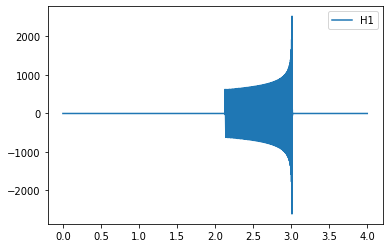

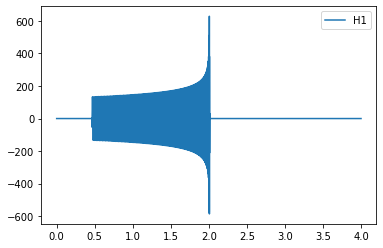

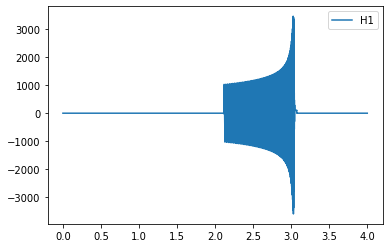

<IPython.core.display.Javascript object>

In [171]:
for i in range(H1_det_wf.data.shape[0]):
    plt.figure()
    plt.plot(H1_det_wf.sample_times[i], H1_det_wf.data[i], label="H1")
    #     plt.plot(L1_det_wf.sample_times[i], L1_det_wf.data[i], label="L1")
    plt.legend()
#     plt.xlim(1., 2)

In [172]:
from scrinet.analysis import frequencyseries_batch as fs
from scrinet.sample.likelihood import log_likelihood
import bilby

<IPython.core.display.Javascript object>

In [173]:
# initialise a single interferometer representing LIGO Hanford
H1 = bilby.gw.detector.get_empty_interferometer("H1")
# set the strain data at the interferometer
H1.set_strain_data_from_power_spectral_density(
    sampling_frequency=sample_rate, duration=seglen
)

/Users/Rhys/anaconda3/envs/NN_for_PE/lib/python3.8/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise


<IPython.core.display.Javascript object>

In [174]:
delta_f = 1.0 / seglen

# from pycbc
# Dynamic range factor: a large constant for rescaling
# GW strains.  This is 2**69 rounded to 17 sig.fig.

DYN_RANGE_FAC = 5.9029581035870565e20

<IPython.core.display.Javascript object>

In [175]:
psd = fs.FrequencySeries(
    DYN_RANGE_FAC * DYN_RANGE_FAC * H1.power_spectral_density_array.reshape(1, -1),
    delta_f=delta_f,
    dtype=tf.float64,
)

InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:Mul]

<IPython.core.display.Javascript object>

In [178]:
signal_plus_noise = H1_det_wf.data[0] + np.random.normal(
    scale=0.000001, size=H1_det_wf.data.shape[1]
)
signal_plus_noise = ts.TimeSeries(
    tf.reshape(signal_plus_noise, (1, -1)), delta_t=delta_t
)

<IPython.core.display.Javascript object>

In [179]:
template = fs.FrequencySeries(H1_det_wf.to_frequencyseries().data, delta_f=delta_f)
# signal = fs.FrequencySeries(tf.expand_dims(H1_det_wf.to_frequencyseries().data[0],0), delta_f=delta_f)
signal = fs.FrequencySeries(
    tf.expand_dims(signal_plus_noise.to_frequencyseries().data[0], 0), delta_f=delta_f
)

<IPython.core.display.Javascript object>

In [181]:
%%time
log_like = log_likelihood(
    signal,
    wvf_params,
    det_params,
    n_batch=x.shape[0],
    f_lower=f_lower,
    delta_f=delta_f,
    seglen=seglen,
    sample_rate=sample_rate,
    delta_t=delta_t,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
    psd=None,
    detector="H1",
)

CPU times: user 138 ms, sys: 17.7 ms, total: 156 ms
Wall time: 163 ms


<IPython.core.display.Javascript object>

In [182]:
# log_like

<IPython.core.display.Javascript object>

In [183]:
xla_log_likelihood = tf.function(log_likelihood, experimental_compile=True)

<IPython.core.display.Javascript object>

In [185]:
%%time
xla_log_likelihood(
        signal,
        wvf_params,
        det_params,
        n_batch = x.shape[0],
        f_lower=f_lower,
        delta_f=delta_f,
        seglen=seglen,
        sample_rate=sample_rate,
        delta_t=delta_t,
        amp_model=amp_model,
        amp_basis=amp_basis,
        phase_model=phase_model,
        phase_basis=phase_basis,
        psd=None,
        detector="H1",
    )

CPU times: user 5.34 s, sys: 119 ms, total: 5.46 s
Wall time: 5.87 s


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 299461.56,  -24135.75, -898141.6 ], dtype=float32)>

<IPython.core.display.Javascript object>

In [193]:
%%time
for q in np.linspace(1, 8, 501):
    x = tf.constant([[q, 0, 0], 
                     [q, 0, 0],
                     [q, 1, 1]], dtype=tf.float32)
    wvf_params = sample_helpers.WaveformParams(
        distance=dist,
        m_tot=mtot,
        mass_ratio=tf.reshape(x[:, 0], (-1, 1)),
        chi_1=tf.reshape(x[:, 1], (-1, 1)),
        chi_2=tf.reshape(x[:, 2], (-1, 1)),
        theta=theta,
        phi=phi,
        phase_shift=phase_shift,
    )
    
    log_like = log_likelihood(
    signal,
    wvf_params,
    det_params,
    n_batch=x.shape[0],
    f_lower=f_lower,
    delta_f=delta_f,
    seglen=seglen,
    sample_rate=sample_rate,
    delta_t=delta_t,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
    psd=None,
    detector="H1",
)

CPU times: user 1min 1s, sys: 6.06 s, total: 1min 7s
Wall time: 1min 3s


<IPython.core.display.Javascript object>

In [194]:
%%time
a = xla_log_likelihood(
        signal,
        wvf_params,
        det_params,
        n_batch = x.shape[0],
        f_lower=f_lower,
        delta_f=delta_f,
        seglen=seglen,
        sample_rate=sample_rate,
        delta_t=delta_t,
        amp_model=amp_model,
        amp_basis=amp_basis,
        phase_model=phase_model,
        phase_basis=phase_basis,
        psd=None,
        detector="H1",
    )

CPU times: user 16 ms, sys: 4.28 ms, total: 20.3 ms
Wall time: 18.7 ms


<IPython.core.display.Javascript object>

In [195]:
%%time
for q in np.linspace(1.1, 8, 501):
    x = tf.constant([[q, 0, 0], 
                     [q, 0, 0],
                     [q, 1, 1]], dtype=tf.float32)
    
    wvf_params = sample_helpers.WaveformParams(
        distance=dist,
        m_tot=mtot,
        mass_ratio=tf.reshape(x[:, 0], (-1, 1)),
        chi_1=tf.reshape(x[:, 1], (-1, 1)),
        chi_2=tf.reshape(x[:, 2], (-1, 1)),
        theta=theta,
        phi=phi,
        phase_shift=phase_shift,
    )
    
    log_like = xla_log_likelihood(
    signal,
    wvf_params,
    det_params,
    n_batch=x.shape[0],
    f_lower=f_lower,
    delta_f=delta_f,
    seglen=seglen,
    sample_rate=sample_rate,
    delta_t=delta_t,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
    psd=None,
    detector="H1",
)

CPU times: user 7.28 s, sys: 289 ms, total: 7.57 s
Wall time: 6.88 s


<IPython.core.display.Javascript object>